In [1]:
import os
import numpy as np
import pandas as pd

import cv2
import sys
import gc

import matplotlib.pyplot as plt


IMG_HEIGHT = 180
IMG_WIDTH = 180

In [2]:
#  https://www.analyticsvidhya.com/blog/2021/08/beginners-guide-to-convolutional-neural-network-with-implementation-in-python/
# Upload libraries and Choose a CNN Architecture: 

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from keras.losses import binary_crossentropy
from keras.optimizers import Adam
from keras.models import load_model


## methods for accuracy check

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix # requires counts , integers , 1 or 0
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.metrics import ConfusionMatrixDisplay


from random import sample


In [3]:
def debug_photo( photo  ):
    fig = plt.figure(figsize=(8, 8))
    columns = 4
    rows = 5
    for i in range(1, columns*rows +1):
        loc = np.random.randint(1, len(photo),1 )
        img= photo[loc[0]]  # 1 class pictures , sampled randomly
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()
    

In [4]:
def preprocess_image( x, h=IMG_HEIGHT , w=IMG_WIDTH, pad_value=30, color_scheme=cv2.COLOR_BGR2RGB, inter_method=cv2.INTER_CUBIC ):
    
        timage = cv2.cvtColor(x, color_scheme) 
        
        timage = cv2.copyMakeBorder(timage, pad_value, pad_value, pad_value, pad_value, 
                                           cv2.BORDER_CONSTANT, None, value=[255, 255, 255] ) 
        
        timage=cv2.resize(timage, (h, w), # make all pictures standard
                                 interpolation = inter_method)
        
        
        return timage
        

In [5]:
def accuracy_metrics(model ,  x_test , y_test , loop_count, sample_size ):

        for i in range(0,loop_count):

                loc = np.random.choice( x_test.shape[0], size = int( sample_size*x_test.shape[0]  ), replace=False, p=None)
                x_test_sample = x_test[loc]
                y_test_sample = y_test[loc]
                out = model.predict(x_test_sample)
                out_classes = ( out >= 0.7 ) + 0 # to whole numbers 

                ac_metrics = {
                    "accuracy": [accuracy_score( y_test_sample , out_classes )], 
                    "precision":[precision_score( y_test_sample , out_classes, zero_division=0) ], 
                    "recall":[recall_score( y_test_sample , out_classes )]
                             }

                out_table = pd.DataFrame(ac_metrics,  index=[i])

                if i==0:   
                    result = out_table
                else:
                    result = pd.concat([result, out_table])
                    
        return result  
    

In [40]:
#sys.modules[__name__].__dict__.clear()
#gc.collect()

In [6]:
## Upload train and test data of 1-st class
# del img_data_train_test

data_location = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\2_Train_Test_Augmented_1_class"

img_data_train_test=[] # store pixels  of 0 class
img_data_train_test_classes=[] # store pixels of apples pictures


for dir1 in os.listdir(data_location): # loop through files in each folder
              
        image_path= os.path.join(data_location, dir1) # full path to file we need to upload

        image= cv2.imread( image_path, cv2.IMREAD_COLOR) # import pixels of picture, colored , 3 dimentions
        
        image = preprocess_image(x = image, pad_value=0 )
                 
        img_data_train_test.append(image) # append each picture to single structure
        img_data_train_test_classes.append(1)    # assign class for picture
   

In [7]:
img_data_train_test[0].shape

(180, 180, 3)

In [8]:
## check how size of file depends of image dimetions
sys.getsizeof(img_data_train_test) # 53080 for 250 * 250, no resize during import
                                   # same value for 200*200
                                   # same value for 400*400

41880

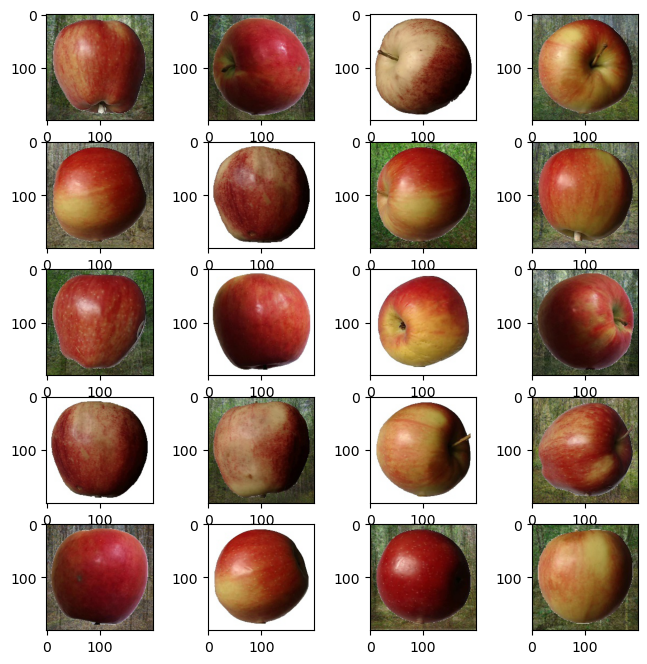

In [10]:
debug_photo( photo=img_data_train_test )    

In [8]:
## Upload train and test data of 0 class

data_location = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\3_Train_Test_Augmented_0_class"

for dir1 in os.listdir(data_location): # loop through files in each folder
              
        image_path= os.path.join(data_location, dir1) # full path to file we need to upload

        image= cv2.imread( image_path, cv2.IMREAD_COLOR) # import pixels of picture, colored , 3 dimentions
        
        image = preprocess_image(x = image, pad_value=0 )
                 
        img_data_train_test.append(image) # append each picture to single structure
        img_data_train_test_classes.append(0)     
 

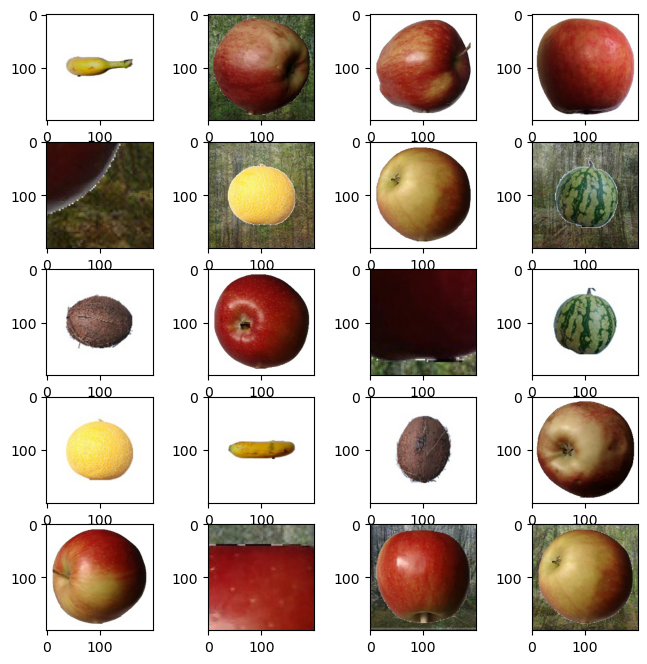

In [12]:
debug_photo( photo=img_data_train_test )    

In [9]:
### Upload last portion of 0 class non augmented photos

data_location = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\4_Train_Test_NON_Augmented_0_class"

for dir1 in os.listdir(data_location): # loop through files in each folder
              
        image_path= os.path.join(data_location, dir1) # full path to file we need to upload

        image= cv2.imread( image_path, cv2.IMREAD_COLOR) # import pixels of picture, colored , 3 dimentions
        
        image = preprocess_image(x = image, pad_value=0 )
                  
        img_data_train_test.append(image) # append each picture to single structure
        img_data_train_test_classes.append(0)     

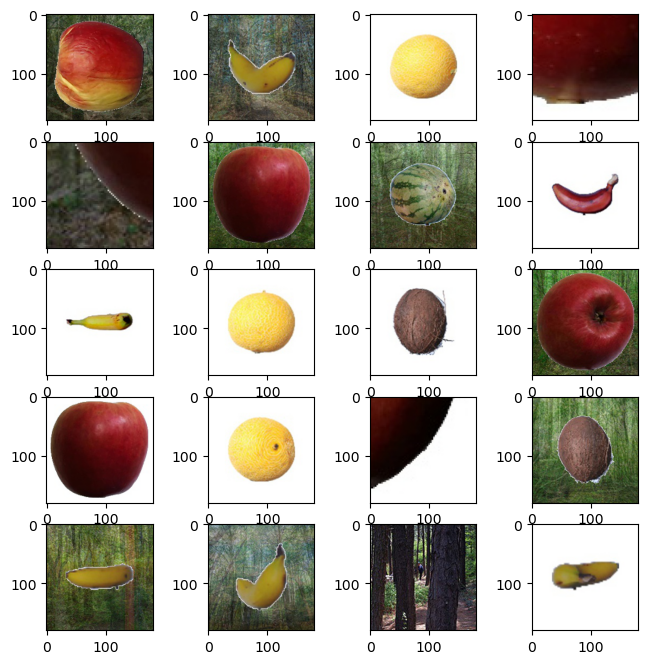

In [10]:
debug_photo( photo=img_data_train_test )    

In [11]:
# generate train and test datasets 
# sklearn and keras requre np.array class

x_train_test = np.array( img_data_train_test, dtype = "float16" )
y_train_test = np.array(img_data_train_test_classes ) # int32 by default

# https://stackoverflow.com/questions/43440821/the-real-difference-between-float32-and-float64


In [12]:
del img_data_train_test , img_data_train_test_classes

In [13]:
# Normalize pixels values
    
x_train_test /= 255 

# https://medium.com/analytics-vidhya/a-tip-a-day-python-tip-8-why-should-we-normalize-image-pixel-values-or-divide-by-255-4608ac5cd26a#:~:text=The%20pixel%20values%20can%20range,range%20from%200%20to%201.
# https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/

In [14]:
#### how float type affects size
sys.getsizeof( x_train_test ) # for float16 , 7190625160, bytes, 7190 mega
                              # for float32 , 14381250160 ,  14381 mega, twice as much
# https://stackoverflow.com/questions/46613748/float16-vs-float32-for-convolutional-neural-networks    
# We can manipulate data type to avoid memory error

3472761760

In [15]:
[ x_train_test.shape ,y_train_test.shape ]

[(17864, 180, 180, 3), (17864,)]

In [16]:
[ x_train_test.dtype , y_train_test.dtype ]

[dtype('float16'), dtype('int32')]

In [19]:
## we want class of interest to be more than 20% to avoid class imbalance
round( sum(y_train_test) / y_train_test.shape[0] ,3 )

0.279

In [16]:
##### Split data into train and test split
# https://towardsdatascience.com/how-to-split-data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c

# for memory error 
# https://stackoverflow.com/questions/57507832/unable-to-allocate-array-with-shape-and-data-type

# with float32 I get 
# MemoryError: Unable to allocate 10.9 GiB for an array with shape (15564, 250, 250, 3) and data type float32

# with float16 I avoid memory error with train_test_split,
# but training time is beyond reasonable timeframe

#### train data  + remainder data ( validation and test )
x_train, x_rem, y_train, y_rem =  train_test_split( x_train_test ,  y_train_test , test_size = 0.35 , shuffle=True, stratify =  y_train_test)
  # dont confuse training and test size
    
#### remainder data split to validation and test
x_valid, x_test, y_valid, y_test = train_test_split(x_rem , y_rem , test_size=0.5,  shuffle=True, stratify =  y_rem)


In [17]:
# del  x_train_test , y_train_test, x_rem, y_rem, keep it for evaluation
gc.collect()

23

In [24]:
#### Back to float32, setting global policy to float16 , so far does not speed up training

# x_train = x_train.astype('float32')
# x_valid = x_valid.astype('float32')
# x_test = x_test.astype('float32')

# [ x_train.dtype , x_valid.dtype , x_test.dtype ]


[dtype('float32'), dtype('float32'), dtype('float32')]

In [18]:
# debug
print(x_train.shape), print(y_train.shape) # is the largest
print(x_valid.shape), print(y_valid.shape) # valid and test are the same
print(x_test.shape), print(y_test.shape)

(11611, 180, 180, 3)
(11611,)
(3126, 180, 180, 3)
(3126,)
(3127, 180, 180, 3)
(3127,)


(None, None)

In [19]:
 # debug, check class balance

[ sum(y_train) / y_train.shape[0] , sum(y_valid) / y_valid.shape[0]   , sum(y_test) / y_test.shape[0]    ] 


[0.27887348204289036, 0.27895073576455537, 0.2788615286216821]

In [27]:
#### Check policies
# https://www.tensorflow.org/api_docs/python/tf/keras/mixed_precision/global_policy
# https://keras.io/api/mixed_precision/policy/

[tf.keras.backend.floatx() , tf.keras.mixed_precision.global_policy()]

# it should help to avoid ( error message does not appear but training time is prolonged)
# "MemoryError: Unable to allocate 10.9 GiB for an array with shape (15564,250, 250, 3) and data type float32"
# 15564 is size of x_train , therefore, fit overwrites datatype to float 32

['float32', <Policy "float32">]

In [ ]:
# float16 actually leads to longer training time ,and default 
# Policy for keras is to proceed with float32

# tf.keras.mixed_precision.set_global_policy('float16')
# tf.keras.backend.set_floatx('float16') 


In [20]:
# delete model if exists
try:
    del model
except:
    print("not generated")

not generated


In [36]:
# https://towardsdatascience.com/how-to-calculate-the-number-of-parameters-in-keras-models-710683dae0ca#:~:text=Model%20Summary&text=Each%20layer%20has%20an%20output,are%20trained%20for%20each%20layer.
# https://www.baeldung.com/cs/convolutional-layer-size

model = Sequential()

model.add( Conv2D( input_shape=(IMG_HEIGHT, IMG_WIDTH,3) , filters = 16 ,  padding="same" , kernel_size = (3,3) , activation="relu" ) ) # 16 *(3*3*3) + 16
model.add( Conv2D( filters=16 , kernel_size=(3,3)  ,  padding="same" , activation="relu" ) ) # # 16 * ( 16 * 3 * 3) + 16
model.add( MaxPool2D( pool_size=(2,2), strides=(2,2) ) )

model.add( Conv2D( filters=32, kernel_size = (3,3) , padding="same" , activation="relu" ) ) # 32*16*3*3 + 32
model.add( Conv2D( filters=32, kernel_size = (3,3) , padding="same" ,  activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )

model.add( Conv2D( filters=64, kernel_size = (3,3) , padding="same" , activation="relu" ) )
model.add( Conv2D( filters=64, kernel_size = (3,3) , padding="same" ,  activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )


model.add( Flatten() )
model.add( Dense(units=128, activation="relu") )
model.add(Dense(units=1, activation="sigmoid")) 

# param_number = output_channel_number * (input_channel_number * kernel_height * kernel_width + 1)

In [37]:
opt = Adam(learning_rate=0.001) # usually its 0.001

model.compile(optimizer=opt, 
             loss=binary_crossentropy, # prob of 1 class
             metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 conv2d_31 (Conv2D)          (None, 180, 180, 16)      2320      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 conv2d_33 (Conv2D)          (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [70]:
## We can either used stored model or fit new one
## https://www.tensorflow.org/guide/mixed_precision

## having size of 150 instead of 220 increase processing for both train_test_split and fit methods

history = model.fit(
            x_train, 
            y_train,
            batch_size=32, # 
            epochs=5,
            verbose=1,
            #   validation_split=0.3
            validation_data = ( x_valid , y_valid )
)

### comments on model fit
## Input represents float16 , while we receive 
# "MemoryError: Unable to allocate 10.9 GiB for an array with shape (15564, 250, 250, 3) and data type float32"
# 15564 is size of x_train , therefore, fit overwrites datatype to float 32


Epoch 1/5
363/363 [==============================] - 322s 868ms/step - loss: 0.0331 - accuracy: 0.9892 - val_loss: 3.4328e-04 - val_accuracy: 1.0000
Epoch 2/5
363/363 [==============================] - 299s 824ms/step - loss: 2.1118e-05 - accuracy: 1.0000 - val_loss: 5.4519e-06 - val_accuracy: 1.0000
Epoch 3/5
363/363 [==============================] - 296s 815ms/step - loss: 1.6830e-06 - accuracy: 1.0000 - val_loss: 1.4006e-06 - val_accuracy: 1.0000
Epoch 4/5
363/363 [==============================] - 300s 828ms/step - loss: 2.1564e-07 - accuracy: 1.0000 - val_loss: 4.2955e-07 - val_accuracy: 1.0000
Epoch 5/5
363/363 [==============================] - 299s 825ms/step - loss: 1.3655e-07 - accuracy: 1.0000 - val_loss: 2.3428e-07 - val_accuracy: 1.0000


In [71]:
print( history.history.keys() )

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


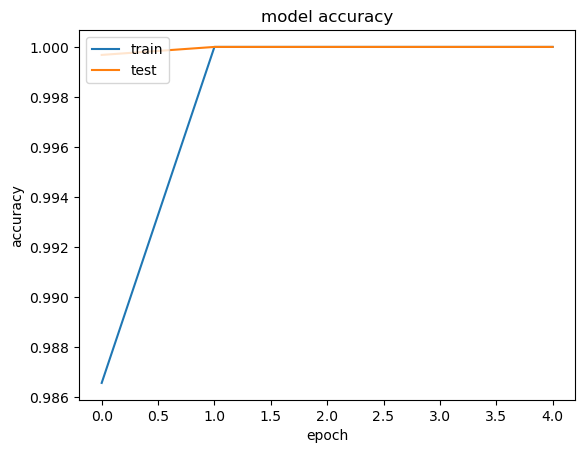

In [44]:
# summarize history for accuracy, usefull for multiple epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
#model.save(r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\model_v0.keras")
model_v0 = load_model(r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\model_v0.keras")
        # model below is train with max of 64 filters which detects better than complications close to Vgg16
        # 2*16 , 2*32, 2*64 , flat , 128
 

In [25]:
model_v0.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 conv2d_17 (Conv2D)          (None, 180, 180, 16)      2320      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 conv2d_19 (Conv2D)          (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [26]:
## Generate forecast with test data
out = model_v0.predict( x_test ) 
np.unique( np.round(out,2) ) # debug , should be probabilities

# Note: increase of batch size and learning rate improved accuracy and increased recall

98/98 [==============================] - 12s 115ms/step


array([0., 1.], dtype=float32)

In [27]:
out_classes = ( out >= 0.7 ) + 0 # to whole numbers 
np.unique( np.round(out_classes,2) )

array([0, 1])

In [28]:
# debug
confusion_matrix( y_test , out_classes , labels = np.array( [1,0] )) #  np.array( [0,1] ) swithes classes, we treat 1 calss as TRUE

array([[ 872,    0],
       [   0, 2255]], dtype=int64)

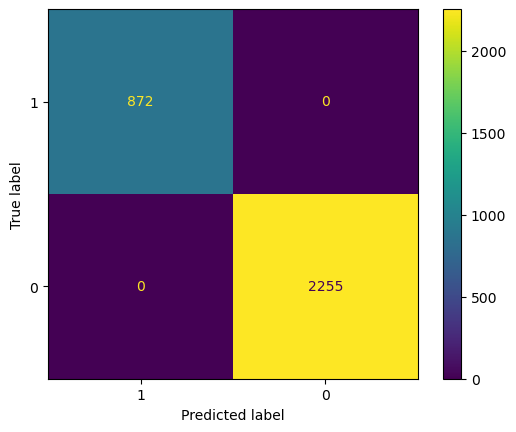

In [29]:
cm = confusion_matrix(y_test, out_classes, labels=np.array( [1,0] ))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=np.array( [1,0] ) )
disp.plot()
plt.show()

In [30]:
# debug
{ "accuracy": [accuracy_score( y_test , out_classes )], 
  "precision":[precision_score( y_test , out_classes, zero_division=0) ], 
  "recall":[recall_score( y_test , out_classes )]  }

{'accuracy': [1.0], 'precision': [1.0], 'recall': [1.0]}

In [21]:
accuracy_metrics( model = model_v0, x_test =  x_train_test , y_test = y_train_test , loop_count=2, sample_size=0.3)    

168/168 [==============================] - 28s 129ms/step


,accuracy,precision,recall
0,1.0,1.0,1.0
1,1.0,1.0,1.0


In [22]:
## Upload train and test data of 1-st class
# del img_data_train_test

folder_test = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\5_Test_FN_0_class\Augmented_1"

img_data_test_array_0_class=[]
photos_list = os.listdir(folder_test)
loc = np.random.choice( len(photos_list) , size = 2000, replace=False, p=None)

for i in loc: # loop through folder in main directory
         
            image_path= os.path.join(folder_test, photos_list[i] ) # full path to file we need to upload
            image= cv2.imread( image_path, cv2.IMREAD_COLOR) # import pixels of picture, colored , 3 dimensions
            
            image = preprocess_image(x = image, pad_value=0 )

            img_data_test_array_0_class.append(image) # append each picture to single structure


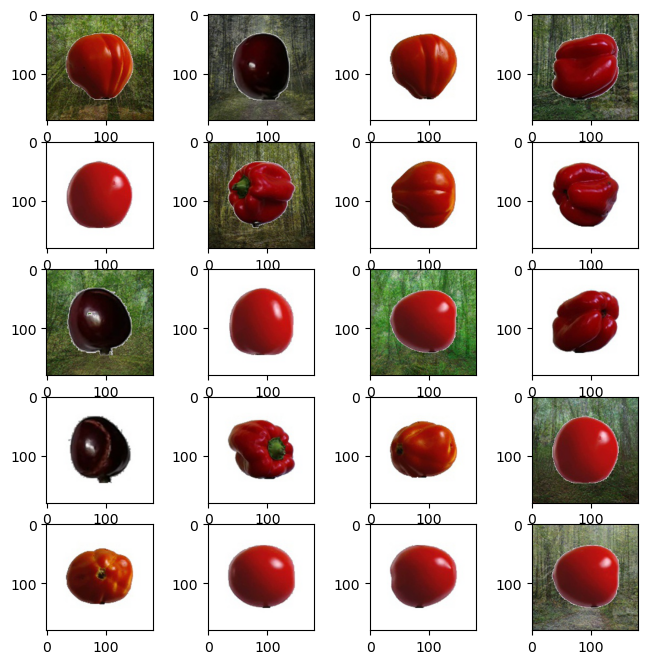

In [33]:
debug_photo( photo=img_data_test_array_0_class )          

In [23]:
x_test_buf_1 = np.array( img_data_test_array_0_class, dtype = "float16" )
x_test_buf_1 /= 255

y_test_buf = np.ones(len(x_test_buf_1))

del img_data_test_array_0_class

In [24]:
[ x_test_buf_1.shape , y_test_buf.shape] 

[(2000, 180, 180, 3), (2000,)]

In [25]:
## Generate forecast with test data
out = model_v0.predict( x_test_buf_1 ) 

63/63 [==============================] - 7s 112ms/step


In [26]:
out_classes = ( out >= 0.7 ) + 0 # to whole numbers 
np.unique(out_classes)

array([0])

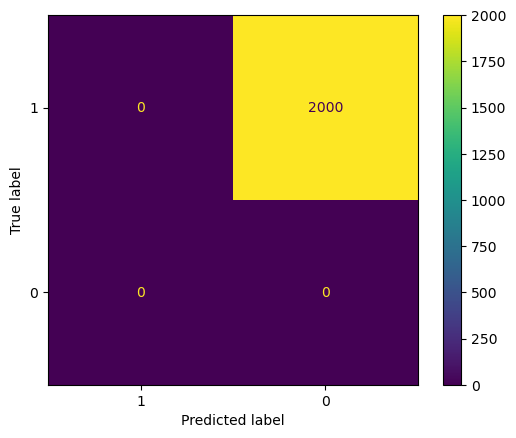

In [27]:
cm = confusion_matrix(y_test_buf, out_classes, labels=np.array( [1,0] ))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=np.array( [1,0] ) )
disp.plot()
plt.show()

# False Negative – The predicted value is negative, but the actual value is positive

## we claim that truth is that all pictures contain Apple, while model argues that 
## photos do not contain apple(desired outcome), therefore, in case model is able to truly differentiate
## specific to apple tone of red color, all predictions should fall into False Negative, lower left corner of confusion matrix

In [28]:
### Lets explore accuracy for pictures with object having same form as apple , but different color channel

folder_train = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\1_Raw_Data_Train_Test"

img_data_array_1_class_test=[] # store pixels of target class

for dir1 in os.listdir(folder_train): # loop through folder in main directory
    for dir2 in os.listdir ( os.path.join(folder_train, dir1) ): # loop through jpg's in each folder
            
            if dir1.split("_")[1]=="y": # if folder with pictures contains "y" in name , then its 1, red apple, 0 otherwise
                                  
                image_path= os.path.join(folder_train, dir1,  dir2) # full path to file we need to upload

                image= cv2.imread( image_path, cv2.IMREAD_COLOR) # import pixels of picture, colored , 3 dimensions

              # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # make sure that scheme is RGB

                         ## add white padding
                image = cv2.copyMakeBorder(image, 30, 30, 30, 30, 
                                           cv2.BORDER_CONSTANT, None, value=[255, 255, 255] )

                     ## resize images to a consistent input
                image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH), # make all pictures standard
                                 interpolation = cv2.INTER_AREA)

                img_data_array_1_class_test.append(image) # append each picture to single structure
  

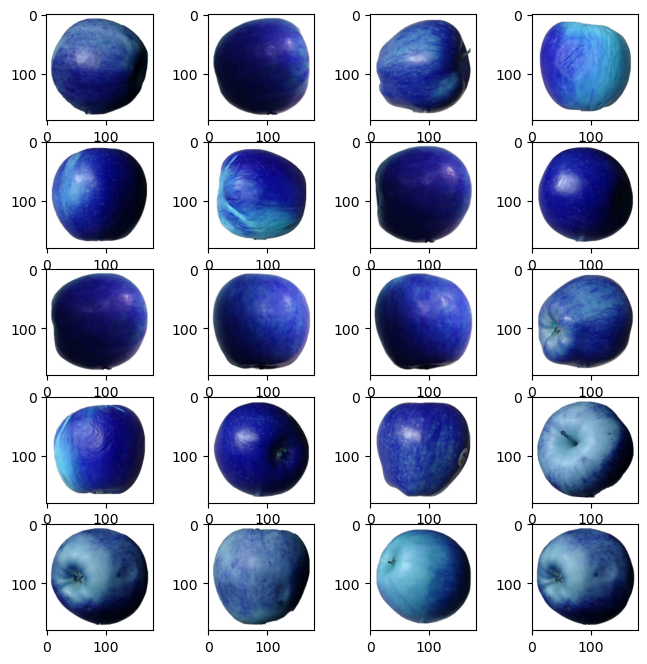

In [40]:
debug_photo( photo=img_data_array_1_class_test )     

In [29]:
# select 2000 photos 

img_data_array_1_class_test = sample(img_data_array_1_class_test,2000)
len( img_data_array_1_class_test )


2000

In [30]:
x_test_buf_2 = np.array( img_data_array_1_class_test, dtype = "float16" )
x_test_buf_2 /= 255

del img_data_array_1_class_test

In [31]:
# we assume that all uploaded pictures are apples
[ x_test_buf_2.shape , y_test_buf.shape ]

[(2000, 180, 180, 3), (2000,)]

In [32]:
## Generate forecast with test data
out = model_v0.predict( x_test_buf_2 ) 
out_classes = ( out >= 0.7 ) + 0 # to whole numbers 
out_classes[0:5]

63/63 [==============================] - 7s 110ms/step


array([[0],
       [0],
       [0],
       [0],
       [0]])

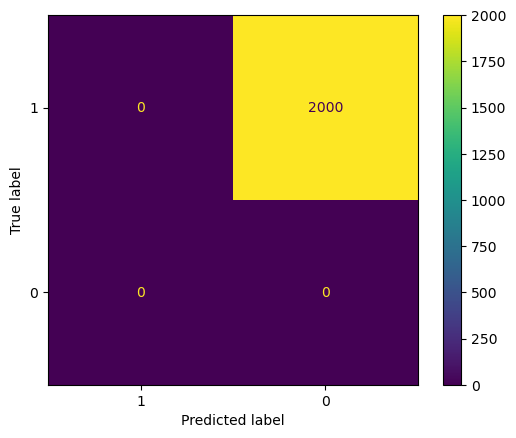

In [33]:
cm = confusion_matrix(y_test_buf, out_classes, labels=np.array( [1,0] ))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=np.array( [1,0] ) )
disp.plot()
plt.show()

# ideally, would expect all predictions in False Negatives , however,
# it might be that RGB is not signifficatly different compare to BGR channels
# for certain pictures of apples
# or color variation of 1 class photos is large enought for coefficients 
# put heavy emphasis on form rather then color

In [34]:

folder_test = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\5_Test_FN_0_class\Augmented_2"

img_data_test_array_1_class_alt_form=[]
photos_list = os.listdir(folder_test)
loc = np.random.choice( len(photos_list) , size = 2000, replace=False, p=None)


for i in loc: # loop through folder in main directory
         
            image_path= os.path.join(folder_test, photos_list[i] ) # full path to file we need to upload
            image= cv2.imread( image_path, cv2.IMREAD_COLOR) # import pixels of picture, colored , 3 dimensions
            
            image = preprocess_image(x = image, pad_value=0 )

            img_data_test_array_1_class_alt_form.append(image) # append each picture to single structure
 

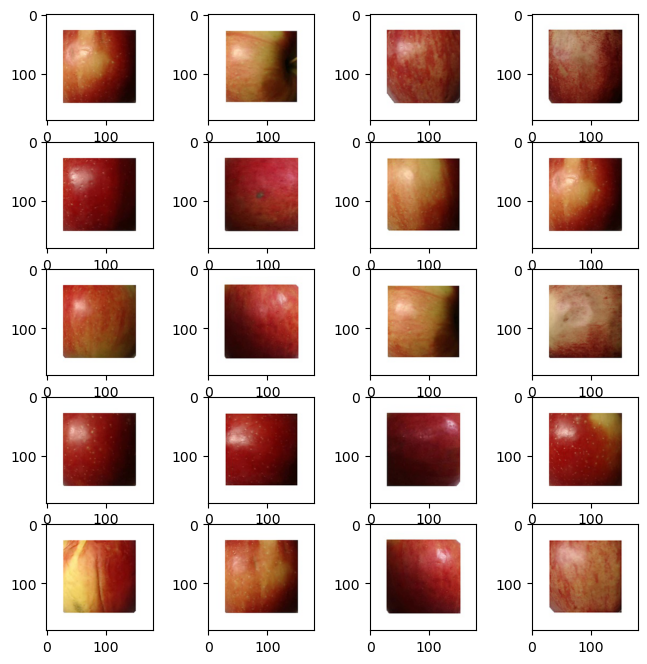

In [35]:
debug_photo( photo=img_data_test_array_1_class_alt_form )    

In [36]:
x_test_buf_3 = np.array( img_data_test_array_1_class_alt_form, dtype = "float16" )
x_test_buf_3 /= 255

del img_data_test_array_1_class_alt_form

In [37]:
out = model_v0.predict( x_test_buf_3 ) 
out_classes = ( out >= 0.7 ) + 0 # to whole numbers 
out_classes[0:5]

63/63 [==============================] - 7s 117ms/step


array([[0],
       [0],
       [0],
       [0],
       [0]])

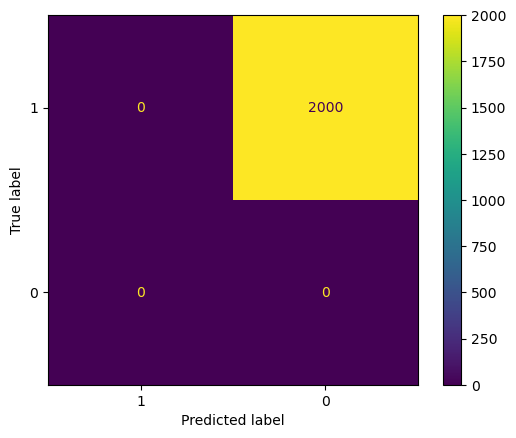

In [38]:
cm = confusion_matrix(y_test_buf, out_classes, labels=np.array( [1,0] ))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=np.array( [1,0] ) )
disp.plot()
plt.show()


In [52]:
# delete model if exists
try:
    del model
except:
    print("not generated")

not generated


In [66]:
############## Train model_v2

model=Sequential()

model.add( Conv2D( input_shape=(IMG_HEIGHT, IMG_WIDTH,3) , filters = 16 , kernel_size = (3,3) , padding="same" , activation="relu" ) )
model.add( Conv2D( filters=16 , kernel_size=(3,3) , padding="same" , activation="relu" ) )
model.add( MaxPool2D( pool_size=(2,2), strides=(2,2) ) )

model.add( Conv2D( filters=32, kernel_size = (3,3) , padding="same" , activation="relu" ) )
model.add( Conv2D( filters=32, kernel_size = (3,3) , padding="same" ,  activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )

model.add( Conv2D( filters=64, kernel_size = (3,3) , padding="same" , activation="relu" ) )
model.add( Conv2D( filters=64, kernel_size = (3,3) , padding="same" ,  activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )

### current layer could be excessive , need to come up with function to instantly check the model
model.add( Conv2D( filters=128, kernel_size = (3,3) , padding="same" , activation="relu" ) )
model.add( Conv2D( filters=128, kernel_size = (3,3) , padding="same" ,  activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )


model.add(Flatten())
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=1, activation="sigmoid")) 



In [67]:
opt = Adam(learning_rate=0.001) # usually its 0.001

model.compile(optimizer=opt, 
             loss=binary_crossentropy, # prob of 1 class
             metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

In [69]:
history = model.fit(
            x_train, 
            y_train,
            batch_size=32, # 
            epochs=5,
            verbose=1,
            #   validation_split=0.3
            validation_data = ( x_valid , y_valid )
)

Epoch 1/5
363/363 [==============================] - 232s 621ms/step - loss: 0.0419 - accuracy: 0.9825 - val_loss: 4.2045e-06 - val_accuracy: 1.0000
Epoch 2/5
363/363 [==============================] - 217s 598ms/step - loss: 9.4134e-07 - accuracy: 1.0000 - val_loss: 2.9178e-06 - val_accuracy: 1.0000
Epoch 3/5
363/363 [==============================] - 214s 590ms/step - loss: 2.4022e-07 - accuracy: 1.0000 - val_loss: 2.6874e-07 - val_accuracy: 1.0000
Epoch 4/5
363/363 [==============================] - 214s 589ms/step - loss: 2.0529e-07 - accuracy: 1.0000 - val_loss: 4.3690e-07 - val_accuracy: 1.0000
Epoch 5/5
363/363 [==============================] - 216s 596ms/step - loss: 8.3895e-08 - accuracy: 1.0000 - val_loss: 3.2006e-07 - val_accuracy: 1.0000


In [53]:
# model.save(r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\model_v1.keras")
model_v1 = load_model(r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\model_v1.keras")

In [54]:
model_v1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

In [55]:
## Generate forecast with test data
out = model_v1.predict( x_test ) 
out_classes = ( out >= 0.7 ) + 0 # to whole numbers 

98/98 [==============================] - 14s 140ms/step


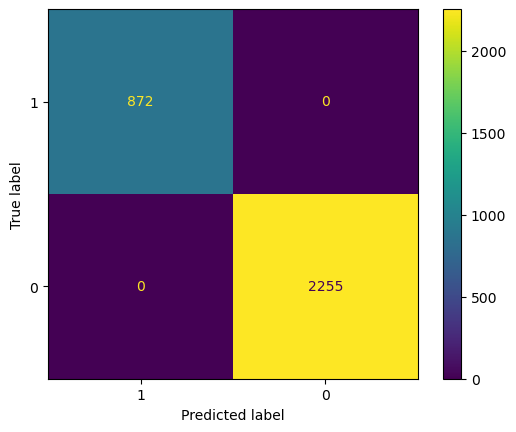

In [56]:
cm = confusion_matrix(y_test, out_classes, labels=np.array( [1,0] ))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=np.array( [1,0] ) )
disp.plot()
plt.show()


In [57]:
accuracy_metrics( model = model_v1, x_test =  x_train_test , y_test = y_train_test , loop_count=2, sample_size=0.2)    

112/112 [==============================] - 17s 154ms/step


,accuracy,precision,recall
0,1.0,1.0,1.0
1,1.0,1.0,1.0


63/63 [==============================] - 9s 136ms/step


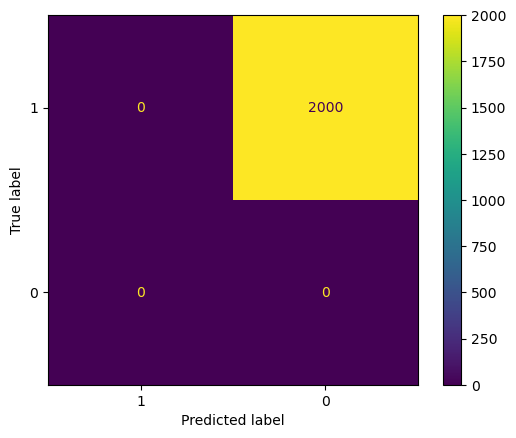

In [58]:
out = model_v1.predict( x_test_buf_1 ) 
out_classes = ( out >= 0.7 ) + 0 # to whole numbers 

cm = confusion_matrix(y_test_buf, out_classes, labels=np.array( [1,0] ))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=np.array( [1,0] ) )
disp.plot()
plt.show()

63/63 [==============================] - 8s 133ms/step


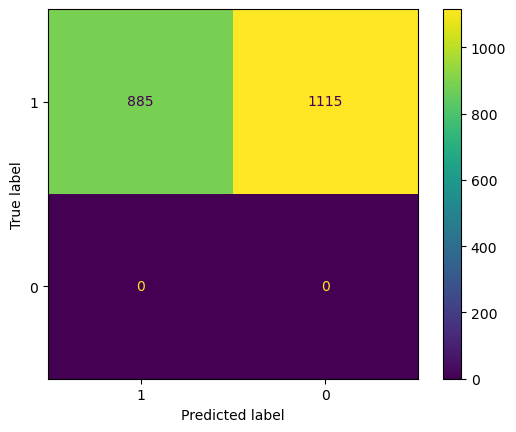

In [59]:
out = model_v1.predict( x_test_buf_2 ) 
out_classes = ( out >= 0.7 ) + 0 # to whole numbers 

cm = confusion_matrix(y_test_buf, out_classes, labels=np.array( [1,0] ))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=np.array( [1,0] ) )
disp.plot()
plt.show()

63/63 [==============================] - 9s 140ms/step


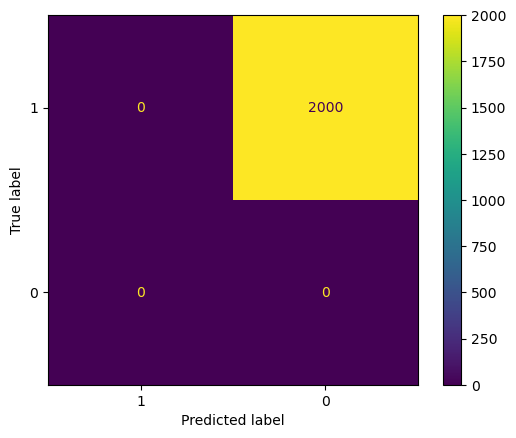

In [60]:
out = model_v1.predict( x_test_buf_3 ) 
out_classes = ( out >= 0.7 ) + 0 # to whole numbers 

cm = confusion_matrix(y_test_buf, out_classes, labels=np.array( [1,0] ))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=np.array( [1,0] ) )
disp.plot()
plt.show()

In [96]:
# delete model if exists
try:
    del model
except:
    print("not generated")

not generated


In [97]:
############## Train model_v2

model=Sequential()

model.add( Conv2D( input_shape=(IMG_HEIGHT, IMG_WIDTH,3) , filters = 16 , kernel_size = (3,3) , padding="same" , activation="relu" ) )
model.add( Conv2D( filters=16 , kernel_size=(3,3) , padding="same" , activation="relu" ) )
model.add( MaxPool2D( pool_size=(2,2), strides=(2,2) ) )

model.add( Conv2D( filters=32, kernel_size = (3,3) , padding="same" , activation="relu" ) )
model.add( Conv2D( filters=32, kernel_size = (3,3) , padding="same" ,  activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )

model.add( Conv2D( filters=64, kernel_size = (3,3) , padding="same" , activation="relu" ) )
model.add( Conv2D( filters=64, kernel_size = (3,3) , padding="same" ,  activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )

model.add( Conv2D( filters=128, kernel_size = (3,3) , padding="same" , activation="relu" ) )
model.add( Conv2D( filters=128, kernel_size = (3,3) , padding="same" ,  activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )

model.add( Conv2D( filters=256, kernel_size = (3,3) , padding="same" , activation="relu" ) )
model.add( Conv2D( filters=256, kernel_size = (3,3) , padding="same" ,  activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )

model.add(Flatten())
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=1, activation="sigmoid")) 

In [98]:
opt = Adam(learning_rate=0.001) # usually its 0.001

model.compile(optimizer=opt, 
             loss=binary_crossentropy, # prob of 1 class
             metrics=['accuracy'])

In [99]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 conv2d_27 (Conv2D)          (None, 180, 180, 16)      2320      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 conv2d_29 (Conv2D)          (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [100]:
history = model.fit(
            x_train, 
            y_train,
            batch_size=32, # 
            epochs=3,
            verbose=1,
            #   validation_split=0.3
            validation_data = ( x_valid , y_valid )
)

Epoch 1/3
363/363 [==============================] - 267s 721ms/step - loss: 0.1162 - accuracy: 0.9541 - val_loss: 9.1918e-07 - val_accuracy: 1.0000
Epoch 2/3
363/363 [==============================] - 254s 701ms/step - loss: 3.4767e-06 - accuracy: 1.0000 - val_loss: 7.3993e-07 - val_accuracy: 1.0000
Epoch 3/3
363/363 [==============================] - 251s 691ms/step - loss: 0.1699 - accuracy: 0.9857 - val_loss: 0.0028 - val_accuracy: 0.9994


In [101]:
model.save(r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\model_v2.keras")
model_v2 = load_model(r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\model_v2.keras")

In [102]:
model_v2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 conv2d_27 (Conv2D)          (None, 180, 180, 16)      2320      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 conv2d_29 (Conv2D)          (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [103]:
## Generate forecast with test data
out = model_v2.predict( x_test ) 
out_classes = ( out >= 0.7 ) + 0 # to whole numbers 

98/98 [==============================] - 18s 178ms/step


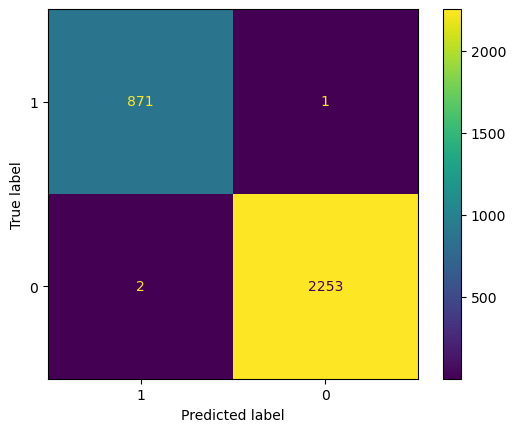

In [104]:
cm = confusion_matrix(y_test, out_classes, labels=np.array( [1,0] ))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=np.array( [1,0] ) )
disp.plot()
plt.show()

In [106]:
accuracy_metrics( model = model_v2, x_test =  x_train_test , y_test = y_train_test , loop_count=2, sample_size=0.2)    

112/112 [==============================] - 21s 191ms/step


,accuracy,precision,recall
0,0.99944,0.998062,1.0
1,0.99944,0.997961,1.0


63/63 [==============================] - 11s 172ms/step


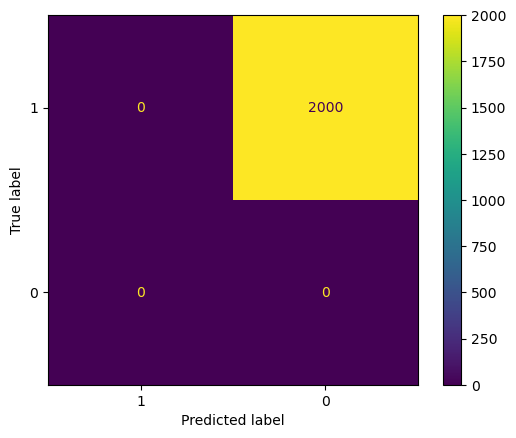

In [107]:
out = model_v2.predict( x_test_buf_1 ) 
out_classes = ( out >= 0.7 ) + 0 # to whole numbers 

cm = confusion_matrix(y_test_buf, out_classes, labels=np.array( [1,0] ))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=np.array( [1,0] ) )
disp.plot()
plt.show()

63/63 [==============================] - 12s 187ms/step


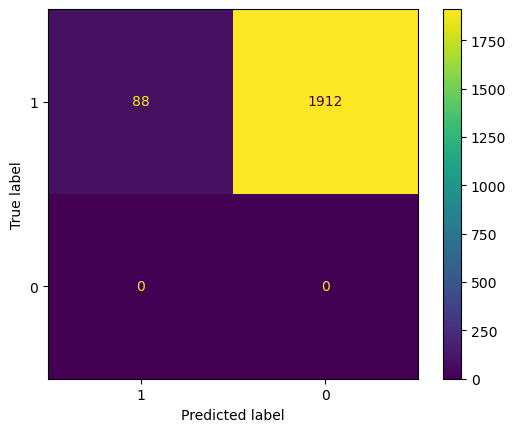

In [108]:
out = model_v2.predict( x_test_buf_2 ) 
out_classes = ( out >= 0.7 ) + 0 # to whole numbers 

cm = confusion_matrix(y_test_buf, out_classes, labels=np.array( [1,0] ))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=np.array( [1,0] ) )
disp.plot()
plt.show()

63/63 [==============================] - 12s 183ms/step


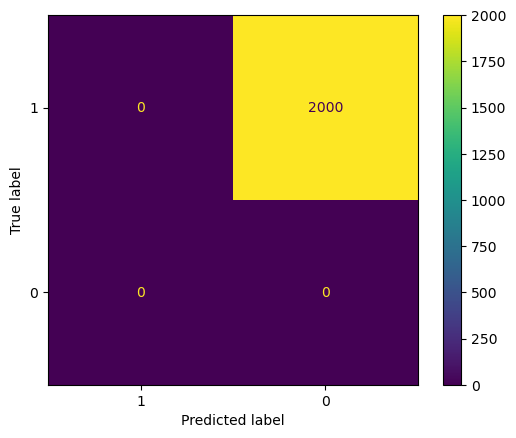

In [111]:
out = model_v2.predict( x_test_buf_3 ) 
out_classes = ( out >= 0.7 ) + 0 # to whole numbers 

cm = confusion_matrix(y_test_buf, out_classes, labels=np.array( [1,0] ))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=np.array( [1,0] ) )
disp.plot()
plt.show()

In [117]:
# delete model if exists
try:
    del model
except:
    print("not generated")

not generated


In [118]:
############## Train model_v3

model=Sequential()

model.add( Conv2D( input_shape=(IMG_HEIGHT, IMG_WIDTH,3) , filters = 16 , kernel_size = (3,3) , padding="same" , activation="relu" ) )
model.add( Conv2D( filters=16 , kernel_size=(3,3) , padding="same" , activation="relu" ) )
model.add( MaxPool2D( pool_size=(2,2), strides=(2,2) ) )

model.add( Conv2D( filters=32, kernel_size = (3,3) , padding="same" , activation="relu" ) )
model.add( Conv2D( filters=32, kernel_size = (3,3) , padding="same" ,  activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )

model.add( Conv2D( filters=64, kernel_size = (3,3) , padding="same" , activation="relu" ) )
model.add( Conv2D( filters=64, kernel_size = (3,3) , padding="same" ,  activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )

model.add( Conv2D( filters=128, kernel_size = (3,3) , padding="same" , activation="relu" ) )
model.add( Conv2D( filters=128, kernel_size = (3,3) , padding="same" ,  activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )

model.add( Conv2D( filters=256, kernel_size = (3,3) , padding="same" , activation="relu" ) )
model.add( Conv2D( filters=256, kernel_size = (3,3) , padding="same" ,  activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )

model.add( Conv2D( filters=512, kernel_size = (3,3) , padding="same" , activation="relu" ) )
model.add( Conv2D( filters=512, kernel_size = (3,3) , padding="same" ,  activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )

model.add(Flatten())
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=1, activation="sigmoid")) 

In [119]:
opt = Adam(learning_rate=0.001) # usually its 0.001

model.compile(optimizer=opt, 
             loss=binary_crossentropy, # prob of 1 class
             metrics=['accuracy'])

In [120]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 conv2d_37 (Conv2D)          (None, 180, 180, 16)      2320      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 conv2d_39 (Conv2D)          (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [121]:
history = model.fit(
            x_train, 
            y_train,
            batch_size=32, # 
            epochs=3,
            verbose=1,
            #   validation_split=0.3
            validation_data = ( x_valid , y_valid )
)

Epoch 1/3
363/363 [==============================] - 310s 843ms/step - loss: 0.2229 - accuracy: 0.9192 - val_loss: 1.0935e-04 - val_accuracy: 1.0000
Epoch 2/3
363/363 [==============================] - 305s 841ms/step - loss: 0.0185 - accuracy: 0.9957 - val_loss: 5.3729e-06 - val_accuracy: 1.0000
Epoch 3/3
363/363 [==============================] - 306s 842ms/step - loss: 4.2314e-07 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 0.9997


In [122]:
model.save(r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\model_v3.keras")
model_v3 = load_model(r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\model_v3.keras")

In [123]:
model_v3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 conv2d_37 (Conv2D)          (None, 180, 180, 16)      2320      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 conv2d_39 (Conv2D)          (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [124]:
## Generate forecast with test data
out = model_v3.predict( x_test ) 
out_classes = ( out >= 0.7 ) + 0 # to whole numbers 

98/98 [==============================] - 22s 217ms/step


In [125]:
accuracy_metrics( model = model_v3, x_test =  x_train_test , y_test = y_train_test , loop_count=2, sample_size=0.2)    

112/112 [==============================] - 25s 225ms/step


,accuracy,precision,recall
0,1.0,1.0,1.0
1,1.0,1.0,1.0


63/63 [==============================] - 14s 225ms/step


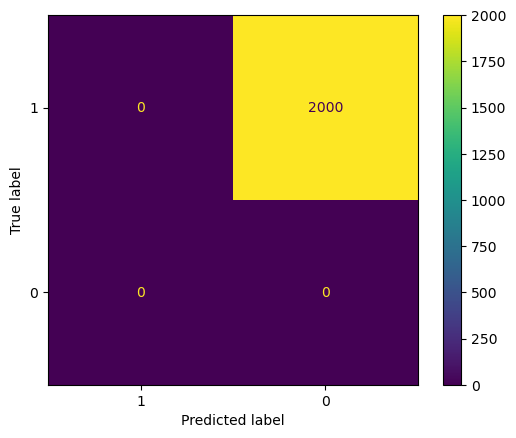

In [126]:
out = model_v3.predict( x_test_buf_1 ) 
out_classes = ( out >= 0.7 ) + 0 # to whole numbers 

cm = confusion_matrix(y_test_buf, out_classes, labels=np.array( [1,0] ))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=np.array( [1,0] ) )
disp.plot()
plt.show()

63/63 [==============================] - 14s 217ms/step


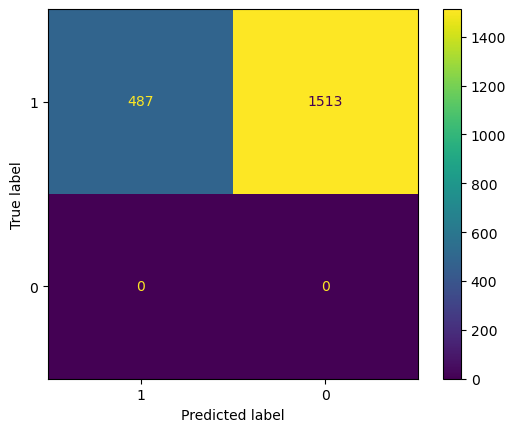

In [127]:
out = model_v3.predict( x_test_buf_2 ) 
out_classes = ( out >= 0.7 ) + 0 # to whole numbers 

cm = confusion_matrix(y_test_buf, out_classes, labels=np.array( [1,0] ))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=np.array( [1,0] ) )
disp.plot()
plt.show()

63/63 [==============================] - 13s 206ms/step


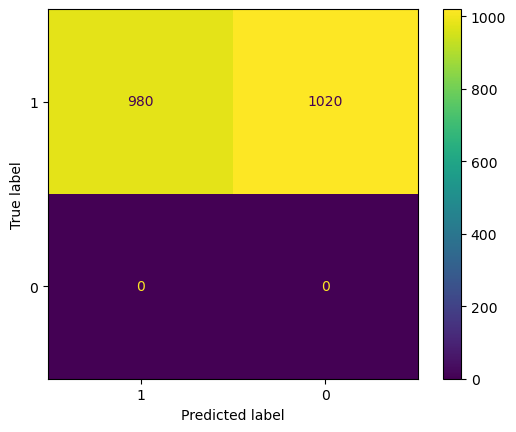

In [128]:
out = model_v3.predict( x_test_buf_3 ) 
out_classes = ( out >= 0.7 ) + 0 # to whole numbers 

cm = confusion_matrix(y_test_buf, out_classes, labels=np.array( [1,0] ))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=np.array( [1,0] ) )
disp.plot()
plt.show()